<a href="https://colab.research.google.com/github/archajoshy/TSA/blob/main/ACF%26PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read the data**

In [ ]:
import pandas as pd
file=pd.read_csv("/content/daily-min-temperatures.csv",index_col='Date')
file

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


**Plot the data**

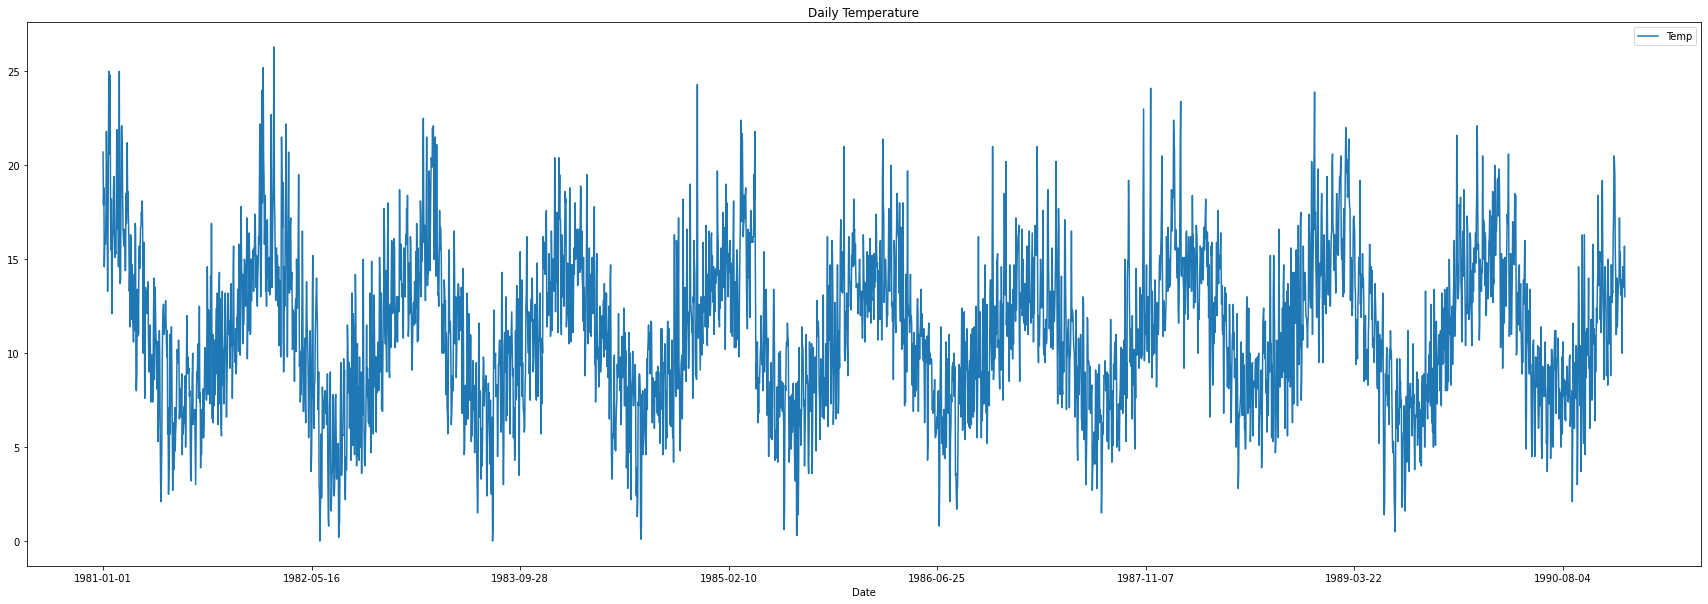

In [ ]:
from matplotlib import pyplot
file.plot(figsize=(30,10))
pyplot.title("Daily Temperature")
pyplot.show()

**Plot ACF**

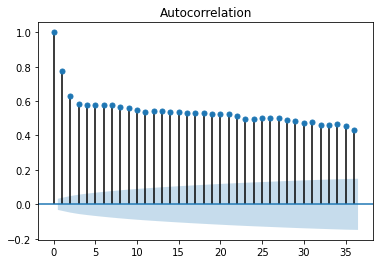

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(file)
pyplot.show()

**Plot PACF**

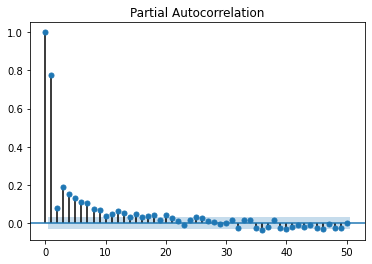

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(file,lags=50)
pyplot.show()

In [ ]:

file2=pd.read_csv("/content/daily-total-female-births.csv",index_col='Date')
file2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


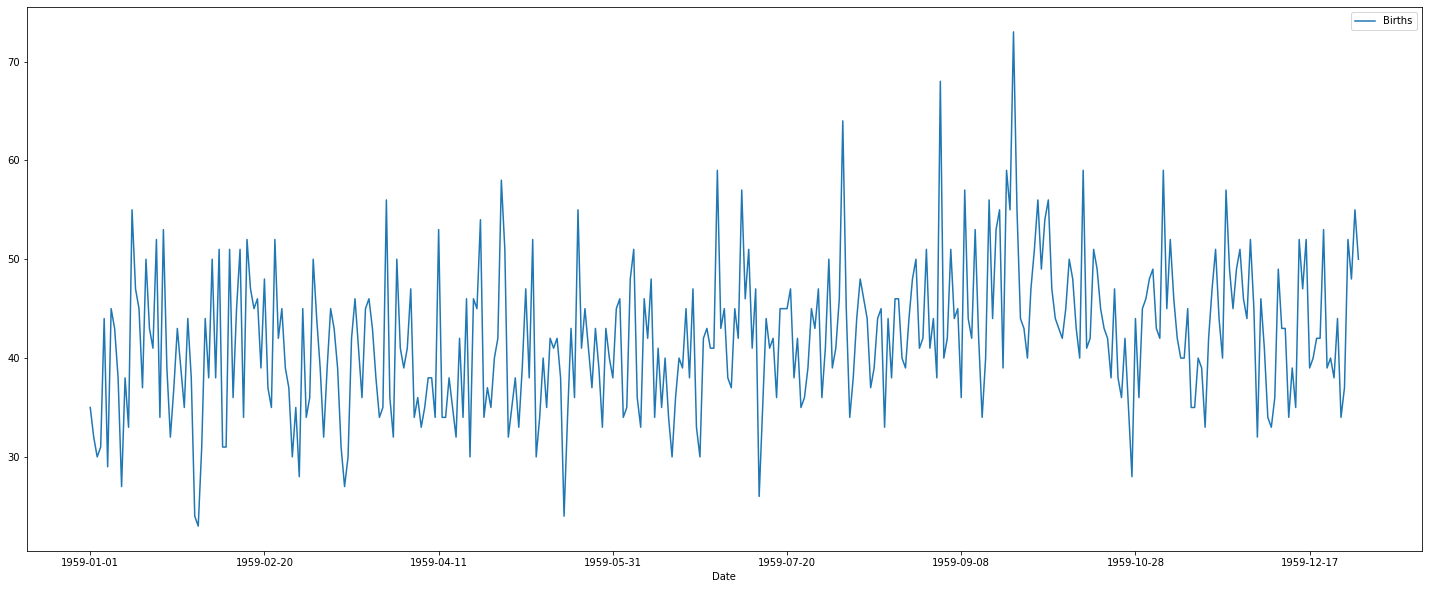

In [ ]:
file2.plot(figsize=(25,10))
pyplot.show()

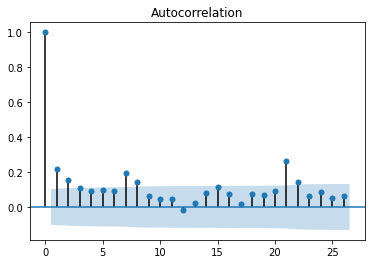

In [ ]:
plot_acf(file2)
pyplot.show()

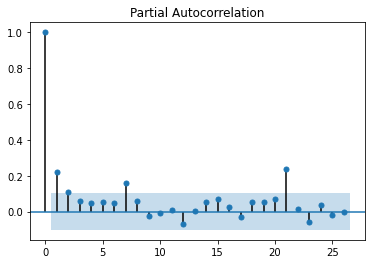

In [ ]:
plot_pacf(file2)
pyplot.show()

**Check stationarity**

**1.Plot Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a046ee310>]],
      dtype=object)

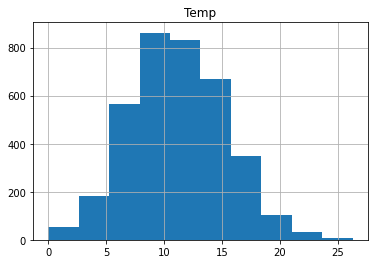

In [ ]:
file.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a03f98fd0>]],
      dtype=object)

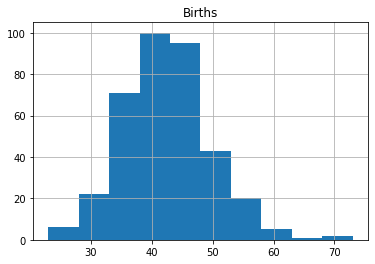

In [ ]:
file2.hist()

**2.Find mean and variance**

In [ ]:
X=file2.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()

In [ ]:
print(mean1,mean2)

39.76373626373626 44.185792349726775


In [ ]:
print(var1,var2)

49.21341021615746 48.708650601690096


In [ ]:
file3=pd.read_csv("/content/airline-passengers.csv",index_col='Month')
file3

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


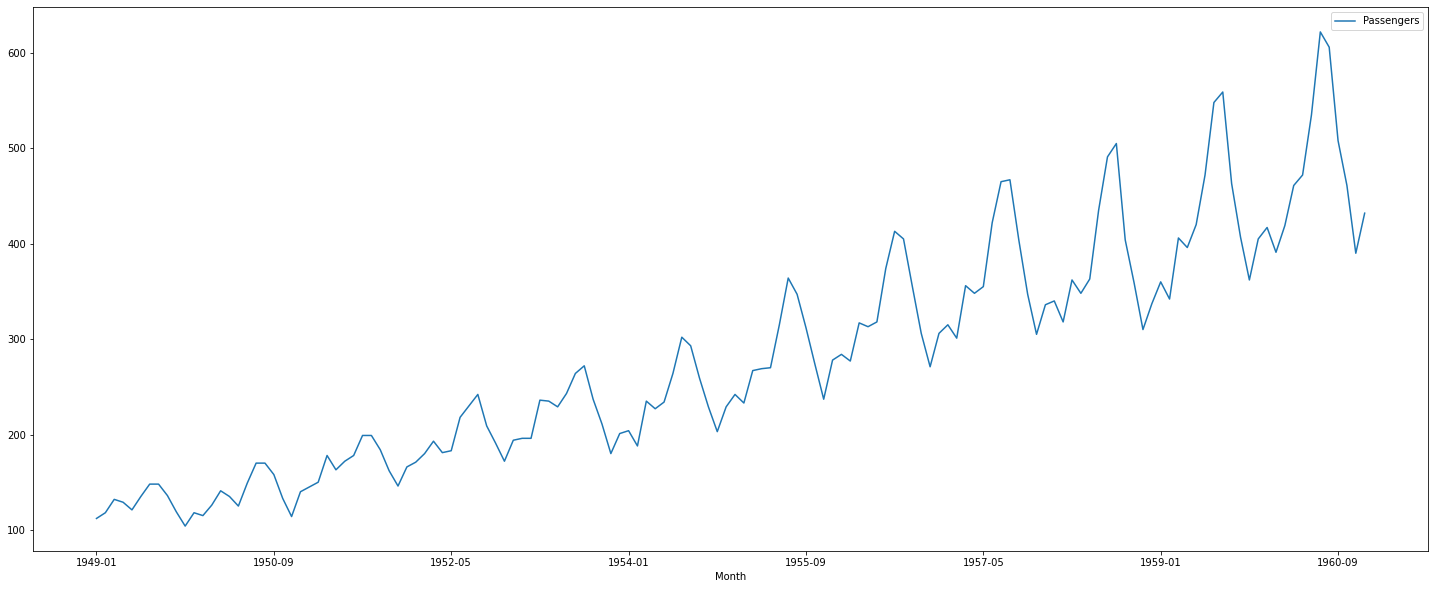

In [ ]:
file3.plot(figsize=(25,10))
pyplot.show()

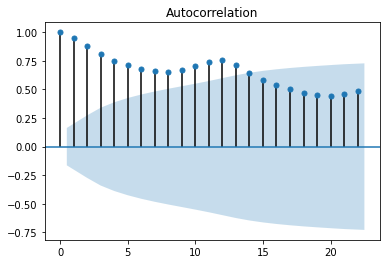

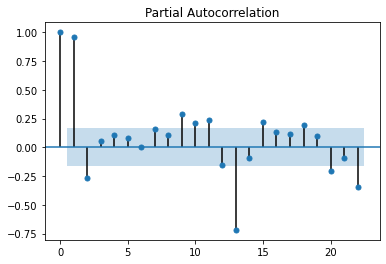

In [ ]:

plot_acf(file3)
pyplot.show()

plot_pacf(file3)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a047cbfd0>]],
      dtype=object)

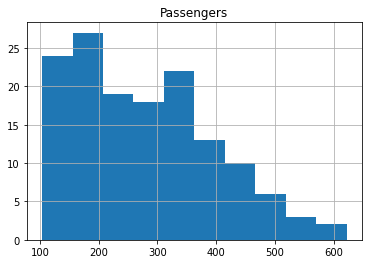

In [ ]:
file3.hist()

In [ ]:
X=file3.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()

In [ ]:
print(mean1,mean2)

182.90277777777777 377.69444444444446


In [ ]:
print(var1,var2)

2244.0877700617284 7367.962191358024


**Non-stationary to stationary conversion**

**Use of log transform**

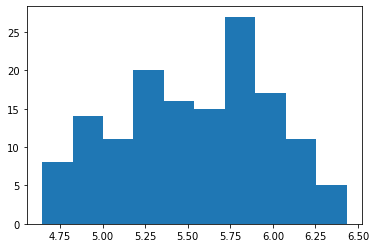

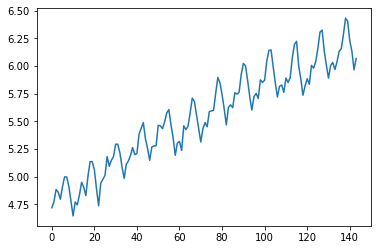

In [ ]:
from numpy import log
X=file3.values
X=log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [ ]:
X=file3.values
X=log(X)
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

5.17514614000377 5.909205777059973
0.06837486074542806 0.04926419375638024


**Square root transform**

In [ ]:
file3=np.sqrt(file3)
file3

,Passengers
Month,
1949-01,10.583005
1949-02,10.862780
1949-03,11.489125
1949-04,11.357817
1949-05,11.000000
...,...
1960-08,24.617067
1960-09,22.538855
1960-10,21.470911


In [ ]:
X=file3.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

13.411100715452259 19.313314603724443
3.045155377773683 4.6903234620084575


In [ ]:
from statsmodels.tsa.stattools import adfuller
file3=pd.read_csv("/content/airline-passengers.csv",index_col='Month',squeeze=True)

In [ ]:
file3=np.sqrt(file3)
X=file3.values
result=adfuller(X)
print(result)

(-1.0441185263932438, 0.7368350745444547, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -450.42992487297715)


**Differencing**

In [ ]:
file3_new=pd.read_csv('/content/airline-passengers.csv')
file3_new

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
file3_new['diff_1'] = file3_new['Passengers'].diff().fillna(0)
file3_new['diff_2']= file3_new['Passengers'].diff(periods=2).fillna(0)

file3_new



,Month,Passengers,diff_1,diff_2
0,1949-01,112,0.0,0.0
1,1949-02,118,6.0,0.0
2,1949-03,132,14.0,20.0
3,1949-04,129,-3.0,11.0
4,1949-05,121,-8.0,-11.0
...,...,...,...,...
139,1960-08,606,-16.0,71.0
140,1960-09,508,-98.0,-114.0
141,1960-10,461,-47.0,-145.0
142,1960-11,390,-71.0,-118.0


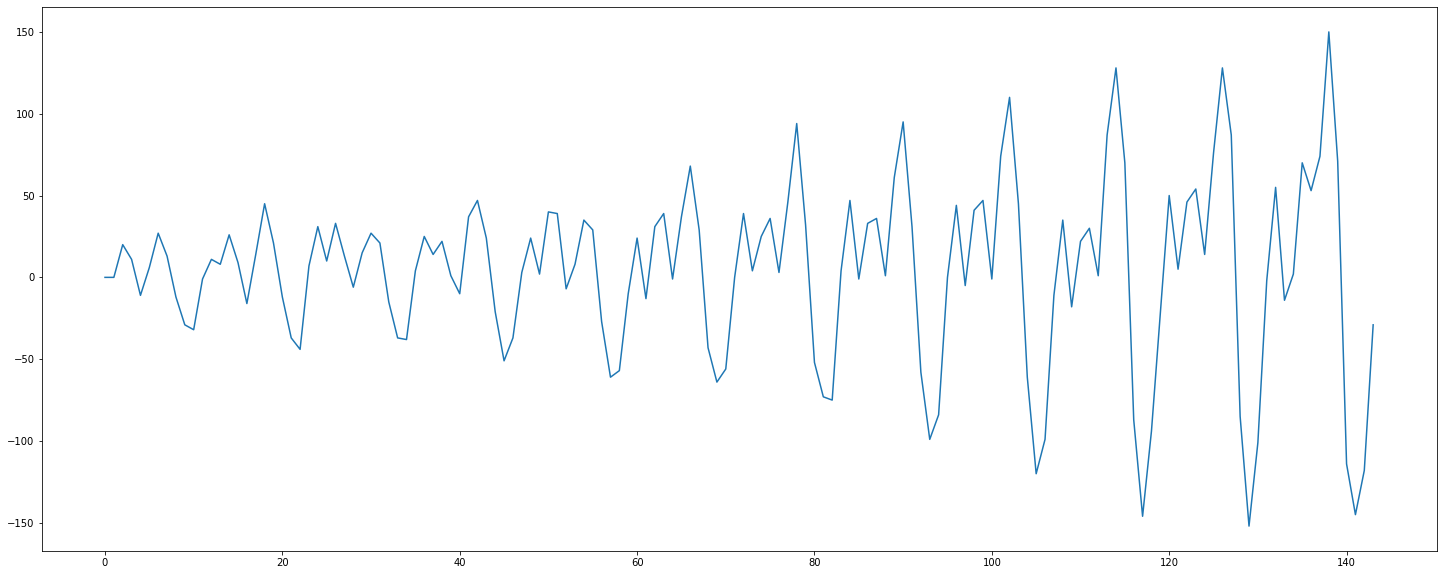

In [ ]:
file3_new["diff_2"].plot(figsize=(25,10))

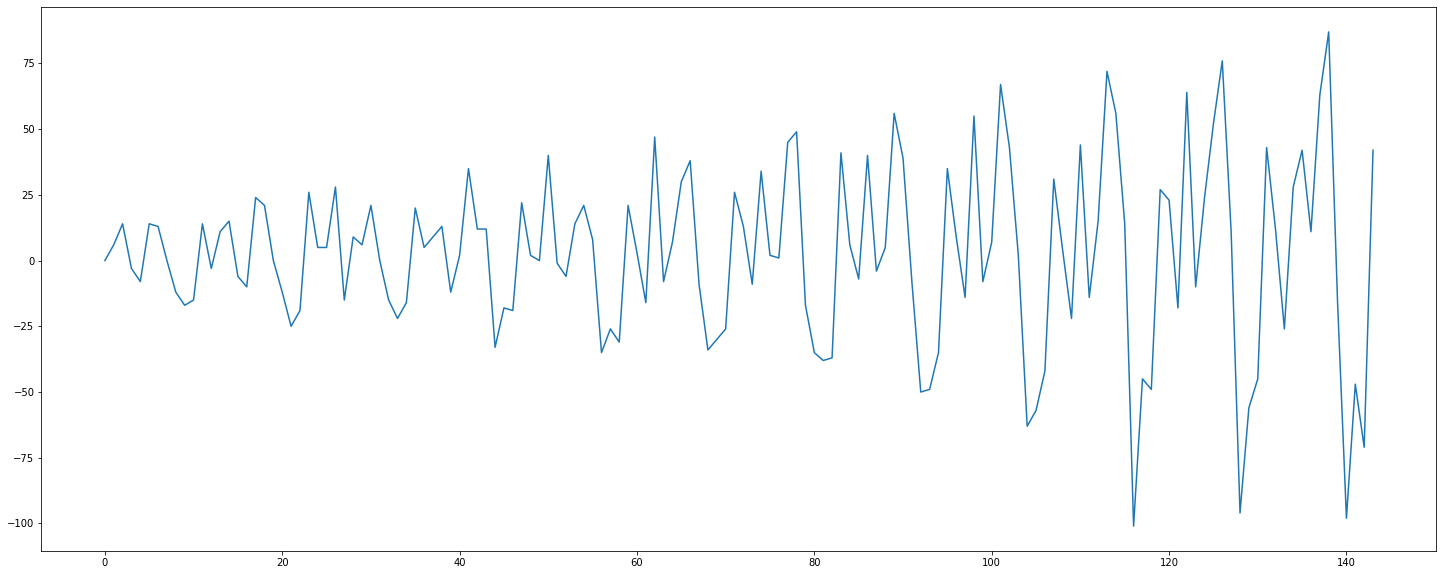

In [ ]:
file3_new["diff_1"].plot(figsize=(25,10))

**AD Fuller Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=file3_new['diff_1'].values
res=adfuller(x)
res

(-2.8891860694712546,
 0.046620039206754685,
 12,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.883867891664528},
 995.4013901509479)

**Test for stationarity**

**Augmented Dcikey fuller test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
file2=pd.read_csv("/content/daily-total-female-births.csv",index_col='Date',squeeze=True)

In [ ]:
X=file2.values
result=adfuller(X)

In [ ]:
print(result)

(-4.808291253559765, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)


In [ ]:
file3=pd.read_csv("/content/airline-passengers.csv",index_col='Month',squeeze=True)

In [ ]:
X=file3.values
result=adfuller(X)
print(result)

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [ ]:
X=file3.values
X=log(X)
result=adfuller(X)
result

(-1.7170170891069603,
 0.4223667747703914,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 -445.3990312497209)

**Dataset 4**

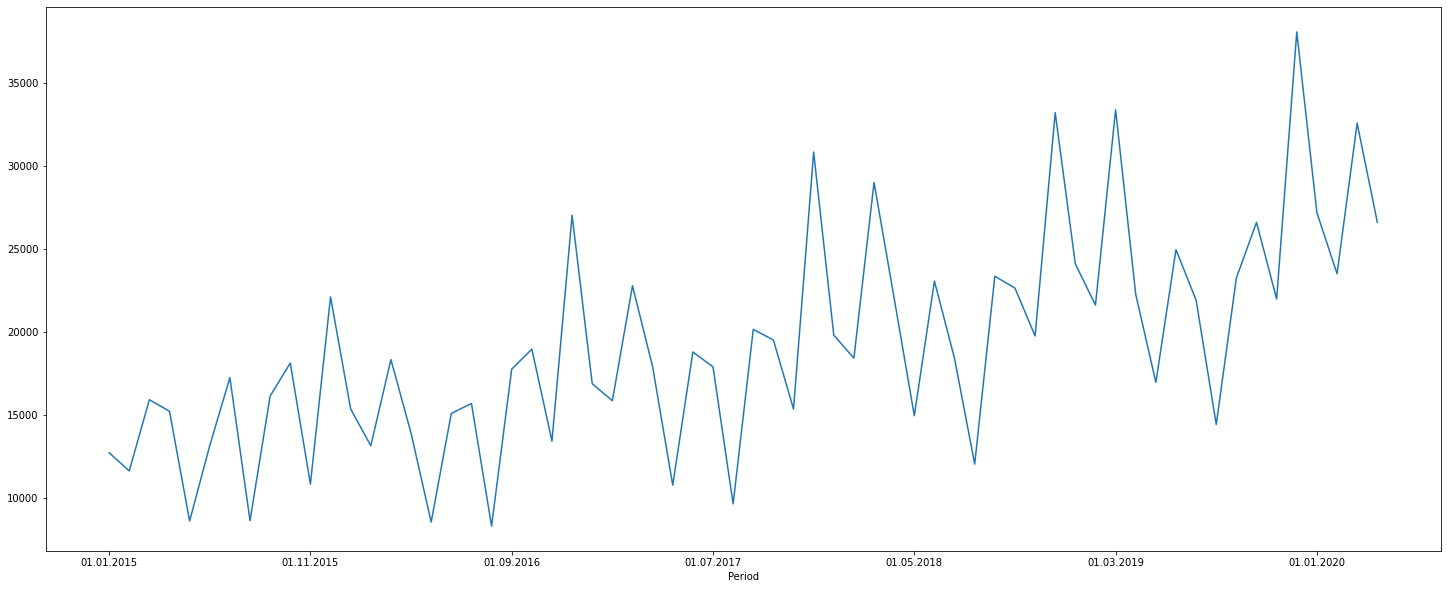

In [ ]:
file4=pd.read_csv('/content/Month_Value_1.csv',index_col="Period")
file4=file4.dropna()
file4["Sales_quantity"].plot(figsize=(25,10))
pyplot.show()

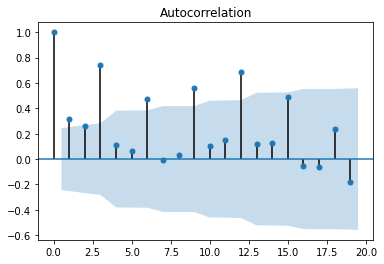

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


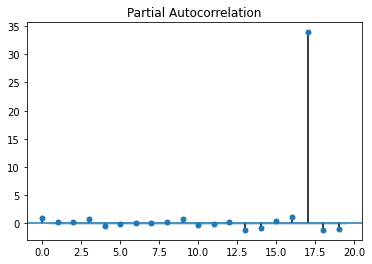

In [ ]:
plot_acf(file4)
pyplot.show()
plot_pacf(file4)
pyplot.show()

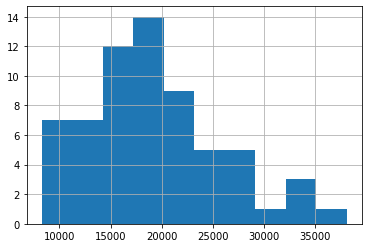

In [ ]:
file4=file4["Sales_quantity"]
file4.hist()

In [ ]:
X=file4.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

15206.875 23187.875
18766450.859375 34917845.671875


In [ ]:
cols=['Period','Sales_quantity']
file4=pd.read_csv('/content/Month_Value_1.csv',usecols=cols,index_col='Period',squeeze=True).dropna()
X=file4.values
res=adfuller(X)
res

(1.1570562060945393,
 0.9956753282590142,
 11,
 52,
 {'1%': -3.562878534649522,
  '10%': -2.597393446745562,
  '5%': -2.918973284023669},
 936.0262923313308)

**Log Transfrom**

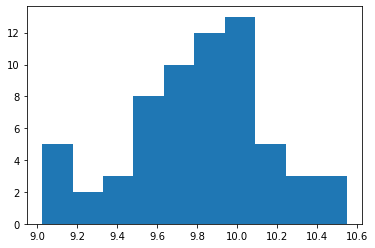

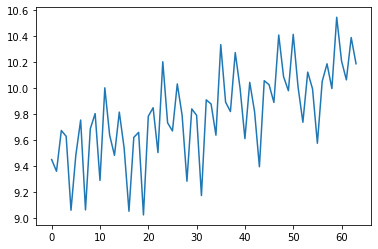

In [ ]:
X=file4.values
X=log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [ ]:
X=file4.values
X=log(X)
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

9.587313816247416 10.018737337397706
0.08739077937022692 0.06641615708556717


In [ ]:
cols=['Period','Sales_quantity']
file4=pd.read_csv('/content/Month_Value_1.csv',usecols=cols,index_col='Period',squeeze=True).dropna()
X=file4.values
X=log(X)
result=adfuller(X)
result

(0.3895900595740417,
 0.9811014460604676,
 11,
 52,
 {'1%': -3.562878534649522,
  '10%': -2.597393446745562,
  '5%': -2.918973284023669},
 -97.3155966820286)

**Square root transform**

In [ ]:
file4=np.sqrt(file4)
file4

Period
01.01.2015    112.822870
01.02.2015    107.870292
01.03.2015    126.182408
01.04.2015    123.397731
01.05.2015     92.843955
                 ...    
01.12.2019    195.112788
01.01.2020    164.875711
01.02.2020    153.326449
01.03.2020    180.468834
01.04.2020    163.141043
Name: Sales_quantity, Length: 64, dtype: float64

In [ ]:
file4=np.sqrt(file4)
X=file4.values
result=adfuller(X)
result

(0.5855231091420972,
 0.9872533095877949,
 11,
 52,
 {'1%': -3.562878534649522,
  '10%': -2.597393446745562,
  '5%': -2.918973284023669},
 14.31227007319194)

**Differencing**

In [ ]:
cols=['Period','Sales_quantity']
file4=pd.read_csv('/content/Month_Value_1.csv',usecols=cols,index_col='Period')
file4['diff_1'] = file4['Sales_quantity'].diff().fillna(0)
file4['diff_2'] = file4['Sales_quantity'].diff(periods=2).fillna(0)
file4=file4.dropna()

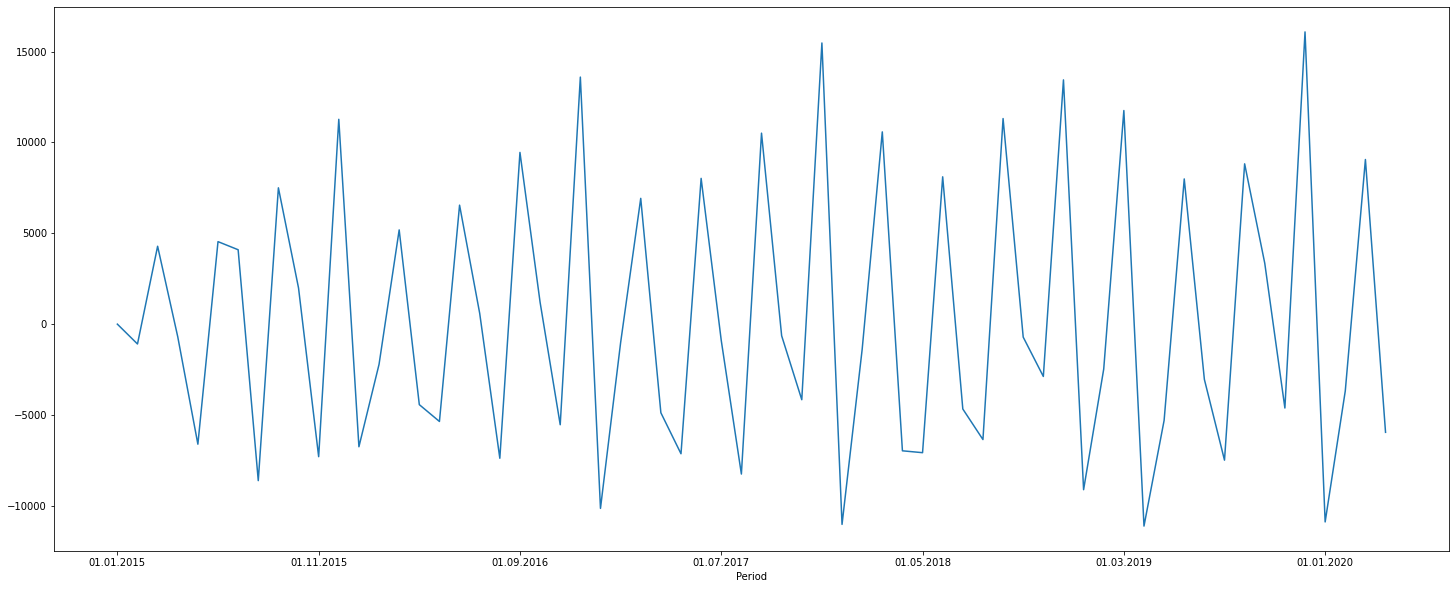

In [ ]:
file4["diff_1"].plot(figsize=(25,10))

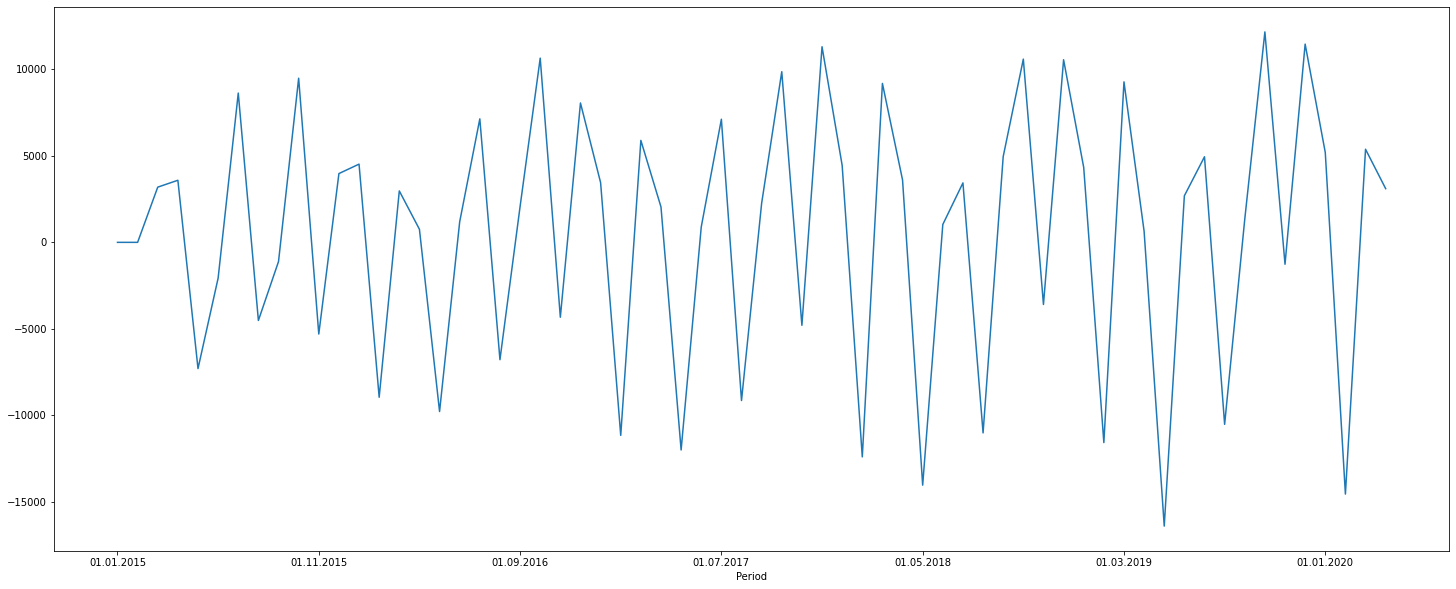

In [ ]:
file4["diff_2"].plot(figsize=(25,10))

In [ ]:
x=file4['diff_2'].values
res=adfuller(x)
res

(-8.099108734541494,
 1.314437438547867e-12,
 9,
 54,
 {'1%': -3.55770911573439,
  '10%': -2.59622219478738,
  '5%': -2.9167703434435808},
 934.0236963612081)

In [ ]:
x=file4['diff_1'].values
res=adfuller(x)
res

(-7.788234655870811,
 8.071371691546697e-12,
 10,
 53,
 {'1%': -3.560242358792829,
  '10%': -2.5967964150943397,
  '5%': -2.9178502070837},
 935.7813765610396)